# Rotational Gates

In [59]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

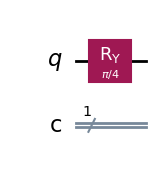

In [60]:
qc_ry = QuantumCircuit(1,1)
theta = np.pi/4
qc_ry.ry(theta, 0)
sv_ry = Statevector.from_instruction(qc_ry)
qc_ry.draw('mpl')

In [61]:
print("Amplitude : ", sv_ry.data)

Amplitude :  [0.92387953+0.j 0.38268343+0.j]


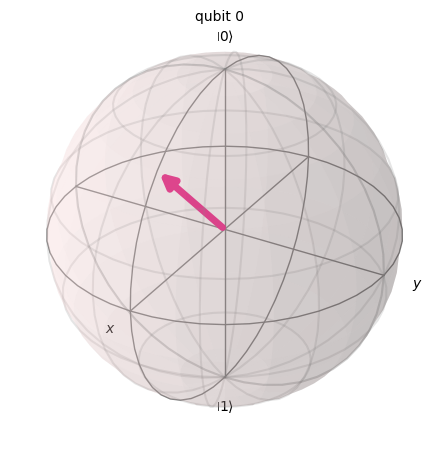

In [62]:
plot_bloch_multivector(qc_ry)

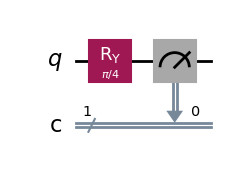

In [63]:
qc_ry.measure(0,0)
qc_ry.draw('mpl')

In [64]:
backend = Aer.get_backend('aer_simulator')

#transpile and run
compiled = transpile(qc_ry,backend)
result = backend.run(compiled,shots=1024).result()

#get classical counts
counts = result.get_counts()
print(counts)

{'1': 142, '0': 882}


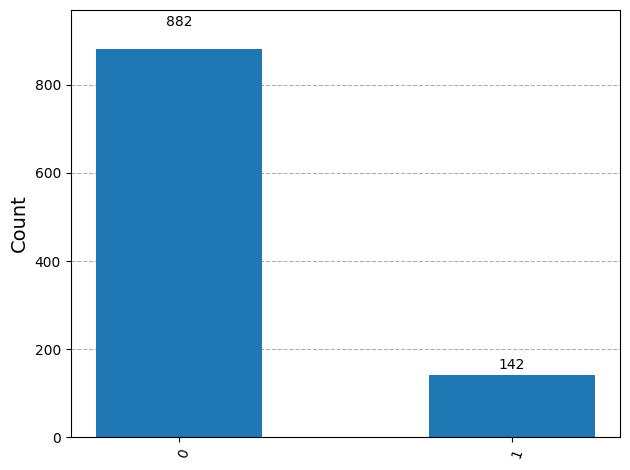

In [65]:
plot_histogram(counts)

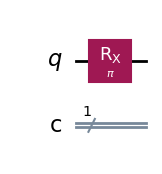

In [66]:
qc_rx = QuantumCircuit(1,1)
theta = np.pi
qc_rx.rx(theta, 0)
sv_rx = Statevector.from_instruction(qc_rx)
qc_rx.draw('mpl')

In [67]:
print("Amplitude : ", sv_rx.data)

Amplitude :  [6.123234e-17+0.j 0.000000e+00-1.j]


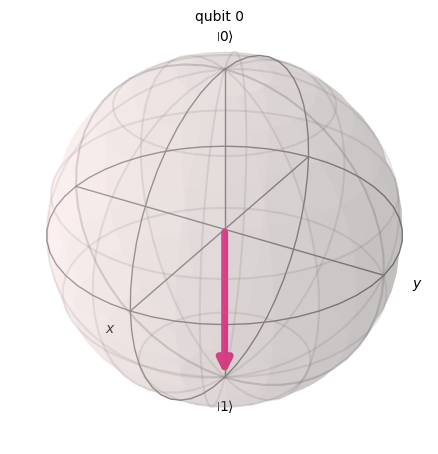

In [68]:
plot_bloch_multivector(qc_rx)

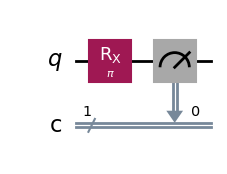

In [69]:
qc_rx.measure(0,0)
qc_rx.draw('mpl')

In [70]:
compiled_rx = transpile(qc_rx,backend)
result_rx = backend.run(compiled_rx,shots=1024).result()

#get classical counts
counts_rx = result_rx.get_counts()
print(counts_rx)

{'1': 1024}


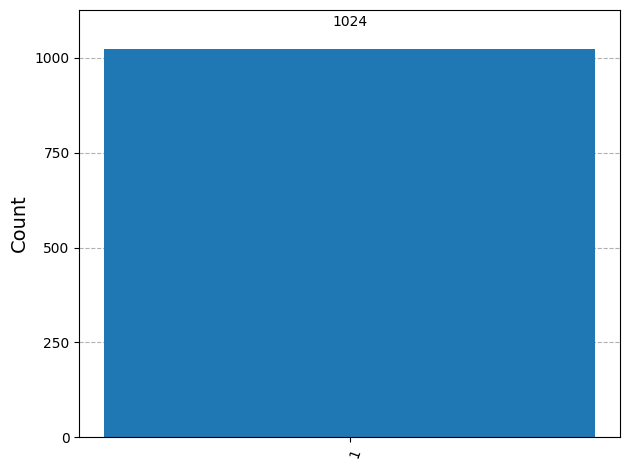

In [71]:
plot_histogram(counts_rx)

# C-NOT Gate

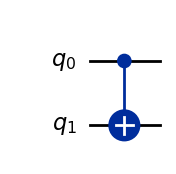

In [72]:
qc_c = QuantumCircuit(2)
qc_c.cx(0,1)
sv_c = Statevector.from_instruction(qc_c)
qc_c.draw('mpl')

In [73]:
print("Amplitude : ", sv_c.data)

Amplitude :  [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


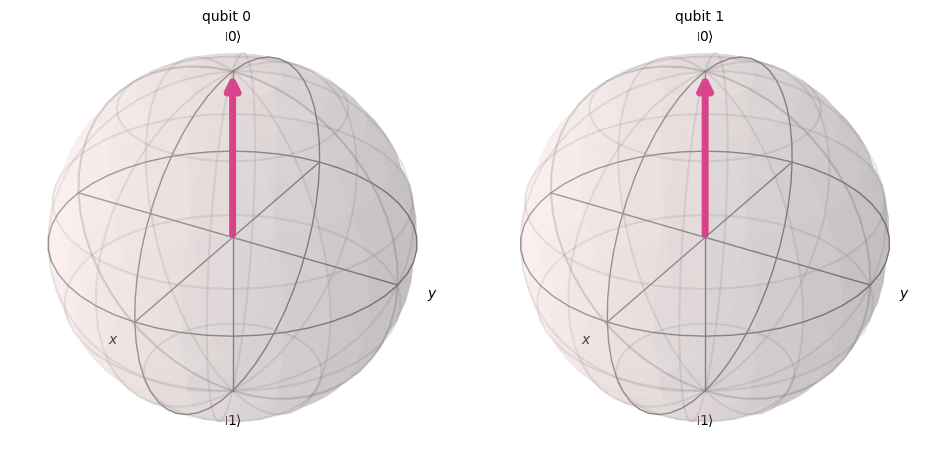

In [74]:
plot_bloch_multivector(qc_c)

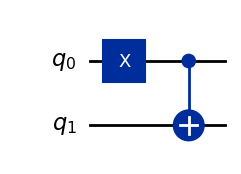

In [75]:
qc_c1 = QuantumCircuit(2)
qc_c1.x(0)
qc_c1.cx(0, 1)
sv_c1 = Statevector.from_instruction(qc_c1)
qc_c1.draw('mpl')


In [76]:
print("Statevector:", sv_c1.data)

Statevector: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


# Entanglement or Bell Pair

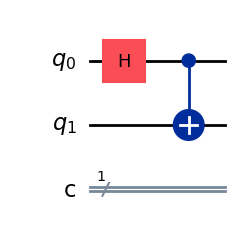

In [77]:
qc_bell = QuantumCircuit(2,1)
qc_bell.h(0)
qc_bell.cx(0,1)
sv_bell = Statevector.from_instruction(qc_bell)
qc_bell.draw('mpl')

In [78]:
sv_bell.data

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

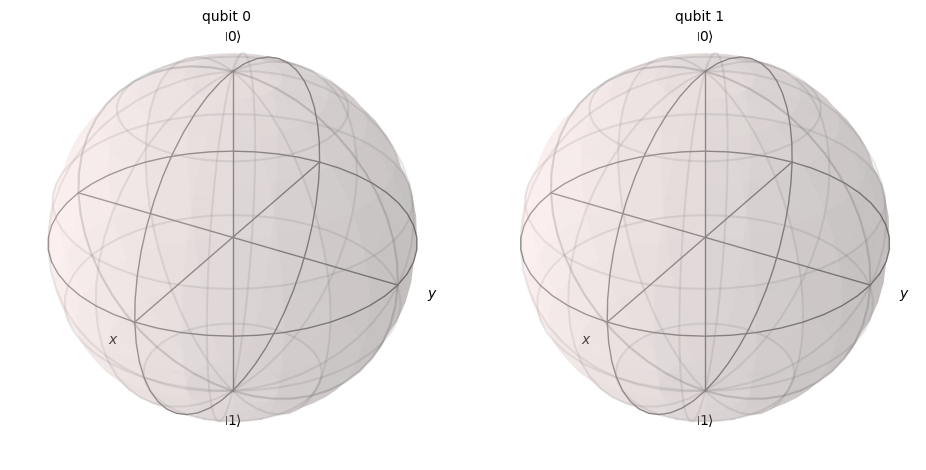

In [79]:
plot_bloch_multivector(qc_bell)

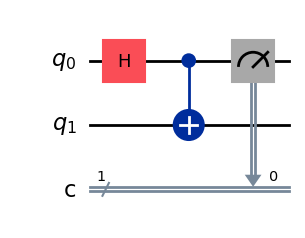

In [80]:
qc_bell.measure(0,0)
qc_bell.draw('mpl')

In [81]:
compiled_bell = transpile(qc_bell,backend)
result_bell = backend.run(compiled_bell,shots=1024).result()

#get classical counts
counts_bell = result_bell.get_counts()
print(counts_bell)

{'0': 529, '1': 495}


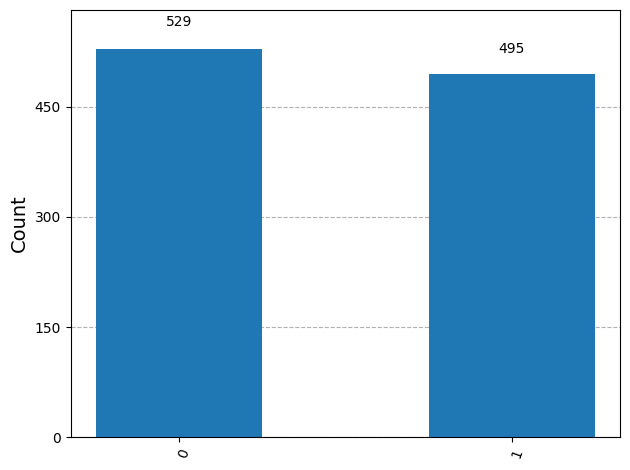

In [82]:
plot_histogram(counts_bell)

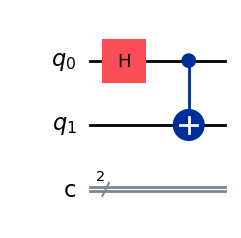

In [103]:
qc_bell_2 = QuantumCircuit(2,2)
qc_bell_2.h(0)
qc_bell_2.cx(0,1)
sv_bell_2 = Statevector.from_instruction(qc_bell_2)
qc_bell_2.draw('mpl')

In [104]:
sv_bell_2.data

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

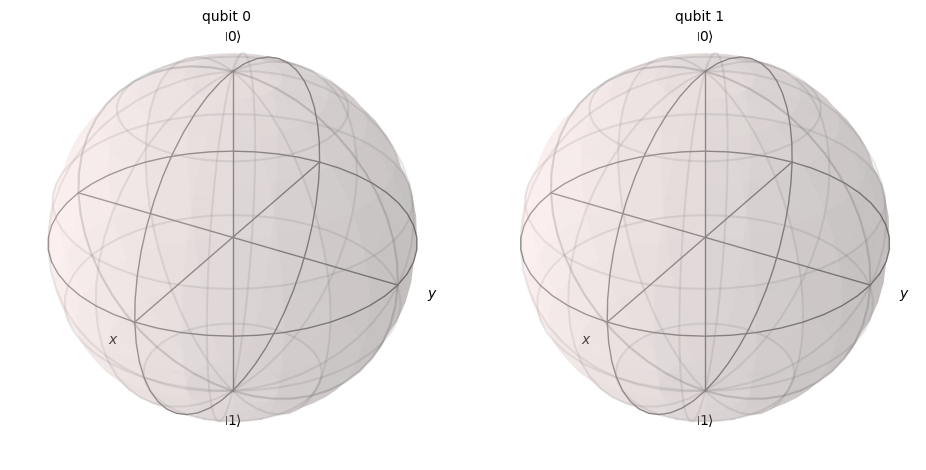

In [105]:
plot_bloch_multivector(sv_bell_2.data)

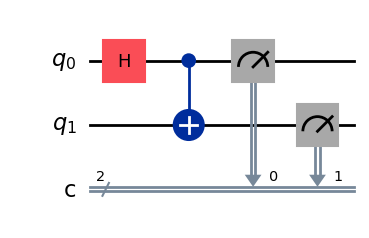

In [106]:
qc_bell_2.measure([0,1],[0,1])
qc_bell_2.draw('mpl')

In [107]:
compiled_bell_2 = transpile(qc_bell_2,backend)
result_bell_2 = backend.run(compiled_bell_2,shots=1024).result()

#get classical counts
counts_bell_2 = result_bell_2.get_counts()
print(counts_bell_2)

{'00': 519, '11': 505}


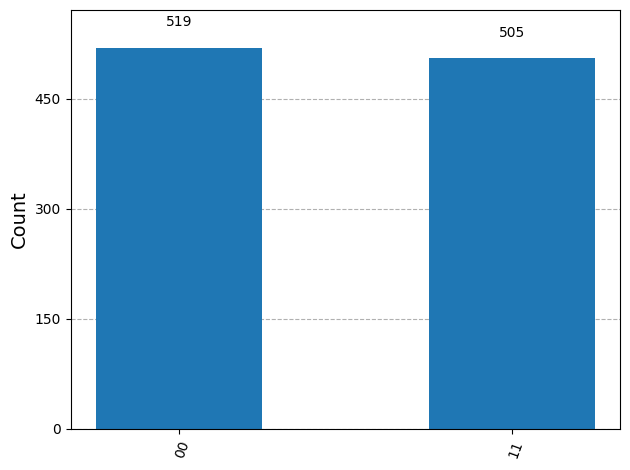

In [108]:
plot_histogram(counts_bell_2)